In [18]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import tensorflow_datasets as tfds
import tensorflow_addons as tfa

In [52]:
import tensorflow as tf

# Load the MNIST dataset.
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Preprocess the data.
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
y_train = (y_train == 3) | (y_train == 7)  # Keep only 3 and 7.
y_test = (y_test == 3) | (y_test == 7)
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

# Define the model.
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
model.summary()

# Compile the model.
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model.
model.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test))

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_9 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 785       
Total params: 785
Trainable params: 785
Non-trainable params: 0
_________________________________________________________________
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2158 - accuracy: 0.9179 - val_loss: 0.1617 - val_accuracy: 0.9424


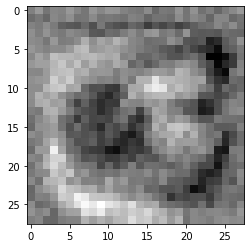

In [56]:
# Get the weights of the model
weights = model.get_weights()

# Plot the weights as a 2D plot
plt.imshow(weights[0].reshape(28, 28), cmap='gray')
plt.show()

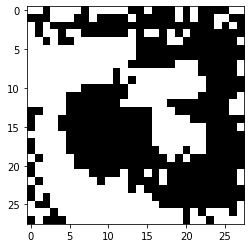

In [57]:
# Plot the sign of the weights as a 2D plot
plt.imshow(np.sign(weights[0]).reshape(28, 28), cmap='gray')
plt.show()

In [58]:
def get_adversial_exemple(model, image, label, eps=0.25):
    image = tf.cast(image, tf.float32)
    image = tf.expand_dims(image, 0)
    with tf.GradientTape() as tape:
        tape.watch(image)
        prediction = model(image)
        loss = tf.keras.losses.sparse_categorical_crossentropy(label, prediction)
    gradient = tape.gradient(loss, image)
    signed_grad = tf.sign(gradient)
    adv_ex = image + eps*signed_grad    
    adv_ex = tf.clip_by_value(adv_ex, 0, 1)
    return adv_ex

In [59]:
X_train_adv = [get_adversial_exemple(model, x, y,eps=0.25).numpy()[0] for x,y in zip(x_train, y_train)]
X_train_adv = np.array(X_train_adv)
X_test_adv = [get_adversial_exemple(model, x, y,eps=0.25).numpy()[0] for x,y in zip(y_test, y_test)]
X_test_adv = np.array(X_test_adv)

InvalidArgumentError: Received a label value of 5 which is outside the valid range of [0, 1).  Label values: 5 [Op:SparseSoftmaxCrossEntropyWithLogits]

NameError: name 'x_test' is not defined

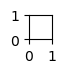

In [ ]:
#Afficher les images
import matplotlib.pyplot as plt
plt.figure(figsize=(7.195, 3.841), dpi=100)
plt.figure(1)
for i in range(200):
  plt.subplot(10,20,i+1)
  plt.imshow(x_test[i,:].reshape([28,28]), cmap='gray')
  plt.axis('off')
plt.figure(2)
for i in range(200):
  plt.subplot(10,20,i+1)
  plt.imshow(x_test_adv[i,:].reshape([28,28]), cmap='gray')
  plt.axis('off')

plt.show()

# Régression logistique pour classer 3 et 7
https://github.com/msotaquira/binary-logistic-regression-with-MNIST/blob/master/binary-logistic-regression-MNIST.py

In [ ]:
X_train_adv = [get_adversial_exemple(model, x, y,eps=0.25).numpy()[0] for x,y in zip(X_train, Y_train)]
X_train_adv = np.array(X_train_adv)
X_test_adv = [get_adversial_exemple(model, x, y,eps=0.25).numpy()[0] for x,y in zip(X_test, Y_test)]
X_test_adv = np.array(X_test_adv)

InvalidArgumentError: Received a label value of 1 which is outside the valid range of [0, 1).  Label values: 1 [Op:SparseSoftmaxCrossEntropyWithLogits]

Epoch 1/30
13/13 - 0s - loss: 0.5108 - accuracy: 0.8805
Epoch 2/30
13/13 - 0s - loss: 0.3311 - accuracy: 0.9822
Epoch 3/30
13/13 - 0s - loss: 0.2431 - accuracy: 0.9894
Epoch 4/30
13/13 - 0s - loss: 0.1925 - accuracy: 0.9914
Epoch 5/30
13/13 - 0s - loss: 0.1601 - accuracy: 0.9921
Epoch 6/30
13/13 - 0s - loss: 0.1376 - accuracy: 0.9923
Epoch 7/30
13/13 - 0s - loss: 0.1212 - accuracy: 0.9923
Epoch 8/30
13/13 - 0s - loss: 0.1088 - accuracy: 0.9925
Epoch 9/30
13/13 - 0s - loss: 0.0990 - accuracy: 0.9927
Epoch 10/30
13/13 - 0s - loss: 0.0910 - accuracy: 0.9927
Epoch 11/30
13/13 - 0s - loss: 0.0844 - accuracy: 0.9928
Epoch 12/30
13/13 - 0s - loss: 0.0789 - accuracy: 0.9928
Epoch 13/30
13/13 - 0s - loss: 0.0742 - accuracy: 0.9928
Epoch 14/30
13/13 - 0s - loss: 0.0701 - accuracy: 0.9927
Epoch 15/30
13/13 - 0s - loss: 0.0666 - accuracy: 0.9931
Epoch 16/30
13/13 - 0s - loss: 0.0635 - accuracy: 0.9931
Epoch 17/30
13/13 - 0s - loss: 0.0607 - accuracy: 0.9931
Epoch 18/30
13/13 - 0s - loss: 0.0582 - 

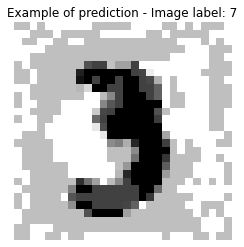

In [ ]:
## Build the model

# - Input layer: 784 nodes (since each image has 28x28 = 784 pixels)
# - Output layer: 1 node with sigmoid activation (output labeled as '0' or '1')
# - No hidden layers

np.random.seed(3)		# fix random seed for reproducibility

input_dim = X_train_adv.shape[1]
output_dim = 1 							

model2 = tf.keras.models.Sequential()
model2.add(tf.keras.layers.Dense(output_dim, input_dim = input_dim, activation='sigmoid'))

# Compile  and train the model
sgd = tf.keras.optimizers.SGD(lr=0.01)
model2.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

num_epochs = 30
batch_size = 1024
history = model2.fit(X_train_adv, Y_train, epochs=num_epochs, batch_size=batch_size, verbose=2)

# Evaluate and predict
score = model2.evaluate(X_test_adv, Y_test, verbose=0) 
print('Test accuracy:', score[1])

Y_pred = model2.predict(X_test_adv)

# Plot one example of prediction
img_number = 10
if Y_pred[img_number] == 0.0:
	predicted_class = 3
else:
	predicted_class = 7

plt.imshow(X_test_adv[img_number,:].reshape(28,28), cmap="gray_r")
plt.title('Example of prediction - Image label: ' + str(predicted_class))
plt.axis('off')
plt.show()